# Importando e lendo dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
dd = pd.read_csv('/content/dados.csv')
dd

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
dd.isnull().sum() #checando dados nulos

# Checando médias, máximas e mínimas

In [ ]:
dd.mean() 

<ipython-input-8-bd2241ceb999>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dd.mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

a media de math é 66.089, a média de leitura é 66.089, a média de escrita é 68.054

In [ ]:
dd.max() # a nota max

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                  100
reading score                               100
writing score                               100
dtype: object

A nota máxima de Matemática, redação e escrita é 100

In [ ]:
dd.min()

gender                                     female
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                      0
reading score                                  17
writing score                                  10
dtype: object

A nota mínima de matemática é 0, leitura é 17 e escrita é 10

# Agrupando Raça e etnia e plotando por média de matemática

In [ ]:
ddEtnia = dd.groupby('race/ethnicity')[['math score']]
ddEtnia #agrupando grupo e selecionando nota de matemática

In [ ]:
ddEtnia.mean() #mostrando a média de matemática em cada grupo percebemos que não existe uma diferença tão grande entre os grupos.

,math score
race/ethnicity,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429


In [ ]:
ddEtnia.count() #mostrando a quantidade de pessoas de cada etnia percebemos que a diferença é grande, porém as médias de nota não diferenciam tanto assim

,math score
race/ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


<Axes: ylabel='race/ethnicity'>

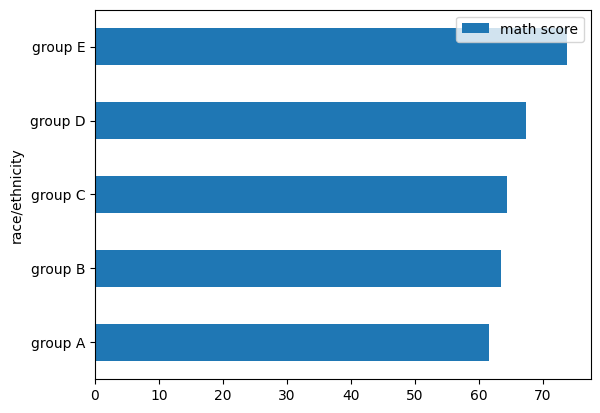

In [ ]:
ddEtnia.mean().plot(kind='barh')

In [ ]:
grafico = px.treemap(dd, path=['race/ethnicity','math score'])
grafico.show() #gráfico abaixo mostra de maneira mais compreensível a diferença entre número de alunos por etnia, porém as médias contidas em cada grupo são equilibradas.

# Agrupando por Nível de escolaridade dos pais e plotando média de escrita

In [ ]:
ddPaiEscol = dd.groupby('parental level of education')[['writing score']]
ddPaiEscol #agrupando grupo e selecionando nota de escrita

In [ ]:
ddPaiEscol.mean()

,writing score
parental level of education,
associate's degree,69.896396
bachelor's degree,73.381356
high school,62.448980
master's degree,75.677966
some college,68.840708
some high school,64.888268


In [ ]:
ddPaiEscol.count()

,writing score
parental level of education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179


<Axes: xlabel='parental level of education'>

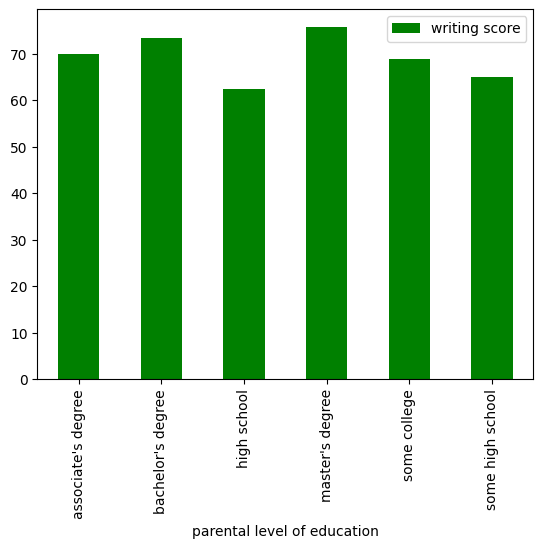

In [ ]:
ddPaiEscol.mean().plot(kind='bar', color='g')

# Agrupamento por curso realizado e plotagem com a média de escrita

In [ ]:
ddcurso = dd.groupby('test preparation course')[['reading score']]
ddcurso #agrupando grupo e selecionando nota de escrita

In [ ]:
ddcurso.mean()

,reading score
test preparation course,
completed,73.893855
none,66.534268


In [ ]:
ddcurso.count()

,reading score
test preparation course,
completed,358
none,642


<Axes: xlabel='test preparation course'>

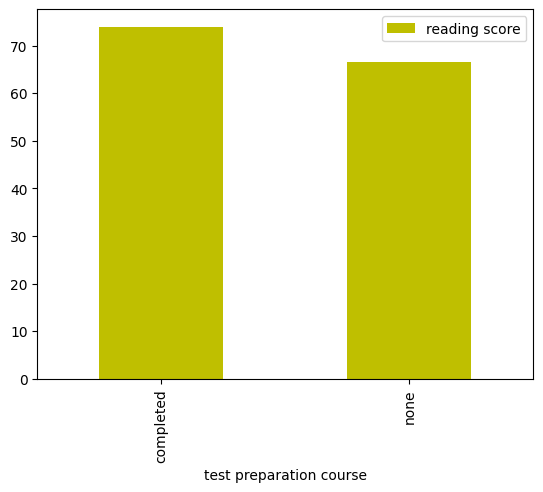

In [ ]:
ddcurso.mean().plot(kind='bar', color='y')